In [1]:
import numpy as np
import math
import pandas as pd
import random
import string
import PyPDF2
import re

In [2]:
# # Completing the dictionary for letter-to-number mapping
# letter_to_number_lookup = {
#     'a': 0,
#     'b': 1,
#     'c': 2,
#     'd': 3,
#     'e': 4,
#     'f': 5,
#     'g': 6,
#     'h': 7,
#     'i': 8,
#     'j': 9,
#     'k': 10,
#     'l': 11,
#     'm': 12,
#     'n': 13,
#     'o': 14,
#     'p': 15,
#     'q': 16,
#     'r': 17,
#     's': 18,
#     't': 19,
#     'u': 20,
#     'v': 21,
#     'w': 22,
#     'x': 23,
#     'y': 24,
#     'z': 25, 
#     '@' : 26
# }



In [3]:


def cipher_generation(matrix, key):
    """
    inputs : matrix, key of length  matrix's columns 
    output : cipher text
    """
#     print(" the matrix i got is \n",matrix)

    sorted_key = sorted(key)
#     print("sorted key ",sorted_key)
    cipher_text = ""
    for k in sorted_key:
#         print("the column is ",k)
#         print("now it appends ",matrix.loc[:,k].sum())
#         print("")
        cipher_text += matrix.loc[:,k].sum()

    return cipher_text


In [4]:
def matrix_creation_for_plaintext(plaintext, key):
    """
    inputs : plaintext of type string, n ---> number of rows, m ---> number of columns
    
    output : returns matrix of type numpy array 
    """
    m = 10
    
    n = 8

    matrix = np.empty((n, m), dtype=str) # creating a n,m dimension matrix

    plaintext = plaintext.lower().replace(" ", "")
    curr = 0
    for i in range(n):   # rows
        for j in range(m):   # columns
            if curr < len(plaintext):
                matrix[i][j] = plaintext[curr]
                curr += 1
            else :
                matrix[i][j] = 'z'
                curr +=1
    
    key_lst = [k for k in key]
    df = pd.DataFrame(matrix, columns = key_lst)
    return df
    
def key_giver():
    """
    inputs : None
    output : key of size 10
    """
    alphabets = list(string.ascii_lowercase)
    
    unique_key = random.sample(alphabets, 10)
    
    while len(set(unique_key)) != 10:
            unique_key = random.sample(alphabets, 10)
    return unique_key
    
def read_my_pdf(file_path):
    """
    uses pypdf2 library to read 
    inputs : file_path
    and returns the text
    """
    with open(file_path,'rb') as file:
        pdf_reader = PyPDF2.PdfReader(file)
        text = ''
        for page_num in range(len(pdf_reader.pages)):
            page = pdf_reader.pages[page_num]
#             reader.pages[page_number]
            text += page.extract_text()
    return text

def read_text(file_path):
    with open(file_path, 'r', encoding = "utf-8") as file:
        text = file.read()
    return text

def split_text_into_chunks(text):
    min_chunk_length = 70
    max_chunk_length=80
    # Use regex to split the text at spaces or periods while ensuring the chunk length is less than the specified maximum
    chunks = re.findall(r'\S.{%d,%d}(?:\s|$|[.])' % (min_chunk_length - 1, max_chunk_length - 1), text)
    return chunks

In [5]:

key = key_giver()
plaintext = "onceupon a time there lived a ghost . he is  not a myth anymore ! abrakadabra . i am batman"
matrix_plaintext = matrix_creation_for_plaintext(plaintext,key)
cipher_text = cipher_generation(matrix_plaintext, key)
matrix_plaintext


,n,p,h,l,w,v,u,q,m,z
0,o,n,c,e,u,p,o,n,a,t
1,i,m,e,t,h,e,r,e,l,i
2,v,e,d,a,g,h,o,s,t,.
3,h,e,i,s,n,o,t,a,m,y
4,t,h,a,n,y,m,o,r,e,!
5,a,b,r,a,k,a,d,a,b,r
6,a,.,i,a,m,b,a,t,m,a
7,n,z,z,z,z,z,z,z,z,z


In [6]:
matrix_plaintext
type(cipher_text)
len(cipher_text)
# len(plaintext)

80

In [7]:
matrix_plaintext
cipher_text

'cediarizetasnaazaltmebmzoivhtaannmeehb.znesaratzorotodazpehomabzuhgnykmzti.y!raz'

In [8]:
file_path = "all books"+".txt"

In [9]:
key_giver()

['o', 'b', 'x', 'y', 'u', 'd', 'i', 'w', 'c', 'r']

In [55]:
# all_text = read_my_pdf(file_path)
all_text = read_text(file_path)

In [56]:
text_chunks = split_text_into_chunks(all_text)

In [57]:
len(text_chunks)


112737

In [58]:
i = 0
all_cipher = []
for plaintext in text_chunks:
    key = key_giver()
    matrix_plaintext = matrix_creation_for_plaintext(plaintext,key)
    cipher_text = cipher_generation(matrix_plaintext, key)
    all_cipher.append([cipher_text,1])
    i += 1
    
    
cipher_df =pd.DataFrame(all_cipher,columns = ["cipher_text", "label"])
cipher_df
    
    
    
#     print(type(curr))
#     print(" next \n \n")


,cipher_text,label
0,htnioozztsdnsczzpwoas\nzzrecheszzooadttzzehotr...,1
1,"hyiweezztu,ytezzvceee\nzzrptutzzzoairnmzzeoi-r...",1
2,",oek,rzzdwgvetzzhmhsvozzefbashzzue,eltzzrrnwer...",1
3,"noyitzzz’,maaizzlsaeg\nzziwstehzzohtnhzzzallwo...",1
4,"eaiaiezzddmswzzzhmeetszzhhtneezz,fodatzzassa;h...",1
...,...,...
112732,nnttrieztuwhrsazdnoaugizcneyikzzaobgon—zueoaeb...,1
112733,"heeiddzzwii,etzzoftovtzzoieeuzzzduanfezzlohinb...",1
112734,"cltrnazzduyytmozevshhazz,ehoetzzmworgonzeorehr...",1
112735,noinnozzrhdieurzigatihdzeiinrtezatetvorzornegu...,1


In [59]:
# 6 books now 
# romeo julilet , alice adv, Dracula, pride and prejudice, frankinstein, sherlock (adventures)
cipher_df.to_pickle("cipher_df.pkl")

In [67]:
maybe = cipher_df.iloc[:50000,:]

In [69]:
maybe.to_pickle("cipher_df2.pkl")

In [60]:
len(all_text.split(" "))

2965222

In [10]:
df = pd.read_pickle("cipher_df2.pkl")

In [11]:
df.shape

(50000, 2)

In [12]:
len(df.head(1).cipher_text.values[0])

80

In [13]:
df_random = pd.read_csv("random_words.csv")
df_random.shape

(50000, 2)

In [14]:
df_random.columns

Index(['CipherText', 'Label'], dtype='object')

In [15]:
df_random = df_random.rename(columns = {"CipherText" : "cipher_text"})
df_random = df_random.rename(columns = {"Label" : "label"})


In [16]:
df_all = pd.concat([df,df_random], ignore_index= True)

In [17]:
df_all["label"].value_counts()
# df_all = df_all.iloc[:-5500]

label
1    50000
0    50000
Name: count, dtype: int64

In [18]:
def split_string(row):
    return pd.Series(list(row['cipher_text']))

# Apply the function to create new columns for each letter
df_letters = df_all.apply(split_string, axis=1)

# Concatenate the new columns with the original DataFrame
df_all = pd.concat([df_all, df_letters], axis=1)

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer

In [20]:
df_all.columns[2:]

Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71,
       72, 73, 74, 75, 76, 77, 78, 79],
      dtype='object')

In [21]:
df_all.tail()

,cipher_text,label,0,1,2,3,4,5,6,7,...,70,71,72,73,74,75,76,77,78,79
99995,"ZqPx3hkvr3w5,Hq9IA5lDlnuiI!uBWfjMD9w64b,HfO1HE...",0,Z,q,P,x,3,h,k,v,...,c,H,A,r,T,g,f,z,o,v
99996,"g8APjdehQlQosp7C,tWEhwNjbaN.ao?6?N.B9;vf.jMZY....",0,g,8,A,P,j,d,e,h,...,4,X,;,v,U,c,9,v,n,e
99997,"LUDb4dRuM2IOsZ!iWlr.WrIFCbUafQc5Sr5VJ,NYr6xtkF...",0,L,U,D,b,4,d,R,u,...,9,Y,X,i,5,H,J,N,O,d
99998,"WU.vk;seDgMFGjfYCVzecWIH,Lyzn2GtryMP9oehxZEY3p...",0,W,U,.,v,k,;,s,e,...,z,p,r,U,3,Q,I,N,Z,1
99999,38nrrtnzjXRrYMJww3JUQUfn78x;ojoc1rpDTSOthFvlk?...,0,3,8,n,r,r,t,n,z,...,t,5,;,z,!,F,z,U,S,4


In [22]:
df_all.columns

Index(['cipher_text',       'label',             0,             1,
                   2,             3,             4,             5,
                   6,             7,             8,             9,
                  10,            11,            12,            13,
                  14,            15,            16,            17,
                  18,            19,            20,            21,
                  22,            23,            24,            25,
                  26,            27,            28,            29,
                  30,            31,            32,            33,
                  34,            35,            36,            37,
                  38,            39,            40,            41,
                  42,            43,            44,            45,
                  46,            47,            48,            49,
                  50,            51,            52,            53,
                  54,            55,            56,           

In [84]:
# col = 5  # Replace with the actual column name

# # Introduce random noise to ASCII values in a text column
# noise_level = 5  # Adjust the noise level as needed

# df_all[col] = df_all[col] + np.random.randint(-noise_level, noise_level + 1, len(df_all))

In [85]:
# noise_level = 0.1  # Adjust the noise level as needed
# num_features = 80  # Assuming 80 features

# for col in range(num_features):
#     df_all[col] = df_all[col] + np.random.normal(0, noise_level, len(df_all))

# # Now df_all contains features with added random noise

In [23]:
X_train, X_test, y_train, y_test = train_test_split(df_all.drop(['cipher_text','label'], axis = 1), df_all["label"], test_size = 0.2, random_state = 42)

In [24]:
# X_train = X_train.loc[:-2500]
X_train
X_train_ascii = X_train.applymap(lambda x: ord(x))
X_train_ascii
X_test_ascii = X_test.applymap(lambda x: ord(x))
X_test_ascii

,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
75721,99,74,54,101,113,83,85,119,87,63,...,65,77,122,55,72,72,88,74,105,114
80184,73,89,120,108,80,71,66,98,69,63,...,50,103,81,65,69,87,105,74,44,65
19864,114,46,105,103,100,46,101,122,111,110,...,116,122,101,8220,100,101,44,104,115,122
76699,88,51,117,70,105,112,33,56,57,71,...,102,121,69,122,87,90,57,84,53,59
92991,83,114,89,52,50,102,33,44,69,59,...,70,67,51,89,105,108,87,114,111,103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32595,112,111,103,114,111,112,122,122,104,109,...,122,122,104,105,105,110,119,98,101,122
29313,115,115,46,116,97,101,122,122,110,116,...,110,122,115,111,111,111,46,108,122,122
37862,101,121,114,104,105,122,122,122,105,97,...,122,122,108,115,111,44,116,110,122,122
53421,116,109,119,72,76,115,51,57,83,74,...,57,63,86,66,88,80,54,87,53,118


In [25]:
vectorizer = CountVectorizer()

In [26]:
X_train = X_train_ascii
X_test = X_test_ascii

In [27]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
75220,105,118,80,75,72,113,68,104,71,100,...,52,108,115,118,82,90,70,44,97,57
48955,116,99,116,111,97,105,122,122,116,116,...,122,122,117,111,105,112,104,120,122,122
44966,101,116,110,8221,97,101,122,122,100,116,...,122,122,116,121,101,111,114,114,122,122
13568,111,116,111,105,114,97,10,122,101,97,...,122,122,109,110,97,101,111,116,122,122
92727,72,97,107,122,52,104,107,113,81,99,...,114,102,112,52,102,89,69,112,54,74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,101,105,111,101,104,122,122,122,114,104,...,122,122,104,119,116,104,97,111,122,122
54886,89,68,115,52,66,65,78,87,63,78,...,63,63,78,106,82,87,73,103,88,75
76820,55,117,63,56,80,102,112,82,79,53,...,82,82,76,69,74,80,72,67,98,70
860,102,116,110,116,45,105,122,122,102,104,...,122,122,116,104,121,115,111,101,122,122


In [56]:
curr = X_train.iloc[10,:].values.reshape(1,-1)

In [59]:
curr = curr
curr

56

In [ ]:
mod

In [32]:
model_rf = RandomForestClassifier(n_estimators = 100, random_state = 42)

In [33]:
model_rf.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [55]:
model_rf.predict(curr)

ValueError: Expected 2D array, got scalar array instead:
array=56.0.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [93]:
y_pred = model_rf.predict(X_test)

In [94]:
df_random
len(df_random.head(1).cipher_text.values[0])
df_all.head()

,cipher_text,label,0,1,2,3,4,5,6,7,...,70,71,72,73,74,75,76,77,78,79
0,htnioozztsdnsczzpwoas\nzzrecheszzooadttzzehotr...,1,h,t,n,i,o,o,z,z,...,z,z,o,r,r,t,m,r,z,z
1,"hyiweezztu,ytezzvceee\nzzrptutzzzoairnmzzeoi-r...",1,h,y,i,w,e,e,z,z,...,z,z,e,y,v,r,d,s,z,z
2,",oek,rzzdwgvetzzhmhsvozzefbashzzue,eltzzrrnwer...",1,",",o,e,k,",",r,z,z,...,z,z,a,r,i,e,a,u,z,z
3,"noyitzzz’,maaizzlsaeg\nzziwstehzzohtnhzzzallwo...",1,n,o,y,i,t,z,z,z,...,z,z,t,i,y,n,v,t,z,z
4,"eaiaiezzddmswzzzhmeetszzhhtneezz,fodatzzassa;h...",1,e,a,i,a,i,e,z,z,...,z,z,t,t,r,e,k,s,z,z


In [95]:
accuracy_score(y_test, y_pred)

1.0

In [96]:
df_all["label"].value_counts()

label
1    50000
0    50000
Name: count, dtype: int64

In [48]:
# my accuracies are
#0.57 for 19000 records
# 0.65 for 17000 records
# 0.87 for 12632 records

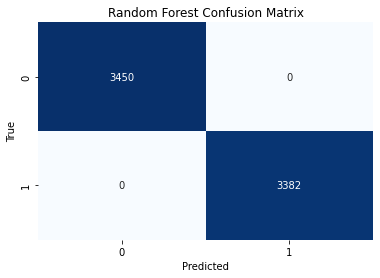

In [49]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_pred and y_true are your predicted and true labels, respectively

# Random Forest
rf_conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(rf_conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [48]:
from sklearn.ensemble import GradientBoostingClassifier


In [49]:
df_all.label.value_counts()

label
1    17158
0    17000
Name: count, dtype: int64

In [50]:
model_gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
model_gb.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [51]:
y_pred = model_gb.predict(X_test)

In [52]:
conf_matrix = confusion_matrix(y_test, y_pred)

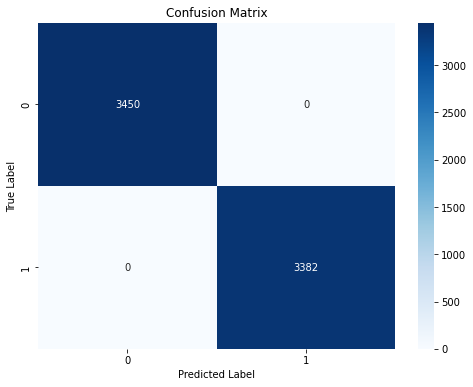

In [53]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model_gb.classes_, yticklabels=model_gb.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [98]:
plain_matrix = matrix_creation_for_plaintext("iniki test iruka? koli vanthucha mutta vanthucha?","absolutize")
new_cipher_text = cipher_generation(plain_matrix,"absolutize")

In [99]:
new_df = pd.DataFrame(list(new_cipher_text)).transpose()
new_df = new_df.applymap(lambda x: ord(x))

In [100]:
new_df

,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
0,105,114,97,116,104,122,122,122,110,117,...,122,122,116,105,109,117,122,122,122,122


In [101]:
model_rf.predict(new_df)

array([1], dtype=int64)

In [68]:
# this is generated randomly
'gtokhugzswkkxudhxcvubxlfbualzvlyqjpooslwtycesguigrdynrzizubtoglhocnqdrhdbfvjdvrz'

plain_matrix = matrix_creation_for_plaintext('gtokhugzswkkxudhxcvubxlfbualzvlyqjpooslwtycesguigrdynrzizubtoglhocnqdrhdbfvjdvrz',"absolutize")
new_cipher_text = cipher_generation(plain_matrix,"absolutize")


In [69]:
new_df = pd.DataFrame(list(new_cipher_text)).transpose()
new_df = new_df.applymap(lambda x: ord(x))

In [70]:
model_rf.predict(new_df)

array([0], dtype=int64)

In [71]:
# correctly predicts as 0

In [ ]:
# so not overfit too